In [1]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from random import random
from matplotlib import pyplot as plt

my_SIFT_instance = cv.SIFT_create()


In [2]:
def getFeatureData(img1, img2):
    sift = cv.SIFT_create()
    kp1, d1 = sift.detectAndCompute(img1,None)
    kp2, d2 = sift.detectAndCompute(img2,None)
    flann = cv.FlannBasedMatcher()
    matches = flann.knnMatch(d1,d2,k=2)
    good = []
    for m,n in matches:
        if(m.distance < 0.75*n.distance):
            good.append(m)
    return kp1,kp2,d1,d2,good

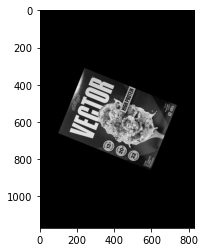

In [3]:
ref = cv.imread("cereal.jpg")
ref = cv.cvtColor(ref, cv.COLOR_BGR2GRAY) 
targe = cv.imread("cereal.jpg")
target = cv.cvtColor(targe, cv.COLOR_BGR2GRAY)

rotmat=cv.getRotationMatrix2D((ref.shape[1]/2,ref.shape[0]/2), int(random()*720-360), (random()*0.6+0.2))
target = cv.warpAffine(target,rotmat,(ref.shape[1],ref.shape[0]))
data=getFeatureData(ref,target)
plt.imshow(target, cmap='gray')

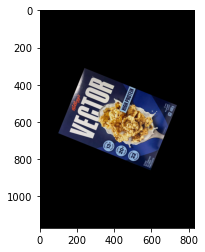

In [4]:
ref_pts = np. float32([data[0][m.queryIdx].pt for m in data[4]]).reshape(-1,1,2)
img_pts = np. float32([data[1][m.trainIdx].pt for m in data[4]]).reshape(-1,1,2)
ref1 = cv.cvtColor(targe, cv.COLOR_BGR2RGB)
rotmat1=cv.estimateAffinePartial2D(ref_pts,img_pts)[0]
ref1 = cv.warpAffine(ref1,rotmat1,(ref.shape[1],ref.shape[0]))
plt.imshow(ref1)

In [7]:
def perTran(i1,i2):
    refc = cv.imread(i1)#load img
    ref = cv.cvtColor(refc, cv.COLOR_BGR2GRAY) #gray scale img
    targetc = cv.imread(i2)#load target
    target = cv.cvtColor(targetc, cv.COLOR_BGR2GRAY)#gray scale target
    data=getFeatureData(ref,target)# get features, keypointsd, descriptors, Lowes ratio
    ref_pts = np. float32([data[0][m.queryIdx].pt for m in data[4]]).reshape(-1,1,2)
    img_pts = np. float32([data[1][m.trainIdx].pt for m in data[4]]).reshape(-1,1,2)
    refc = cv.cvtColor(refc, cv.COLOR_BGR2RGB)#fix reference images colors 
    rotmat=cv.findHomography(ref_pts,img_pts, method=cv.RANSAC)[0]#find rotation matrix
    refRet = cv.warpPerspective(refc,rotmat,(ref.shape[1],ref.shape[0]))#apply rotation matrix

#     put found reference on target for comparison 
    i = 0
    j = 0
    backtorgb = cv.cvtColor(target,cv.COLOR_GRAY2RGB)
    while i <refRet.shape[0]:
        while j < refRet.shape[1]:
            if(refRet[i][j].any()>0):
                backtorgb[i][j]=refRet[i][j]

            j=j+1
        i=i+1
        j=0
    plt.imshow(refRet)
    return backtorgb

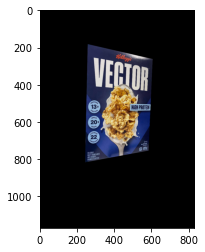

In [8]:
x=perTran("cereal.jpg","cereal_l.jpg")

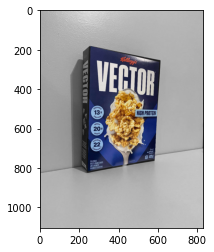

In [9]:
 plt.imshow(x)

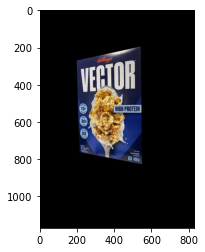

In [10]:
x=perTran("cereal.jpg","cereal_r.jpg")

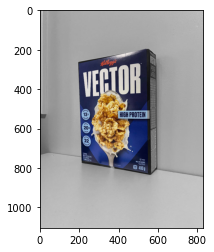

In [11]:
 plt.imshow(x)

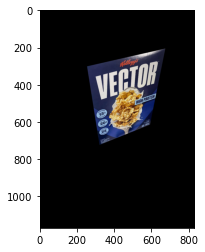

In [12]:
x=perTran("cereal.jpg","cereal_tl.jpg")

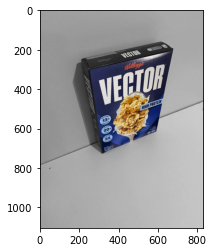

In [13]:
 plt.imshow(x)

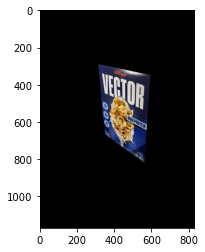

In [14]:
x=perTran("cereal.jpg","cereal_tr.jpg")

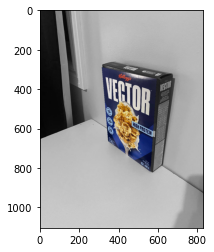

In [15]:
 plt.imshow(x)